### 데이터 불러오기 - MongoDB

In [3]:
from pymongo import MongoClient
# 네트워크 연결 규칙 : protocol://ip:port/path 
client = MongoClient('mongodb://192.168.0.50:27017/')

db = client["DB_SGMN"]
collection = db_name["COL_SCRAPPING_TOSS_COMMENT_HISTORY"]

In [ ]:
getDatafromDB = collection.find()


data = list(getDatafromDB)


In [16]:
import pandas as pd

In [17]:
dfData = pd.DataFrame(data)

In [ ]:
dfData.info()

In [ ]:
dfData.describe(include="all")

In [ ]:
dfDataEdited = dfData.drop(labels='_id',axis=1)
dfDataEdited

In [ ]:
dataToDicOnlyCommentAndDate = dfDataEdited[['COMMENT', 'DATE']].to_dict(orient="list")
dataToDicOnlyCommentAndDate
type(dataToDicOnlyCommentAndDate)

In [ ]:
commentDatasList = dfDataEdited.groupby('DATE')['COMMENT'].apply(list).to_dict()
commentDatasList
type(commentDatasList)

In [ ]:
dateList = dataToDicOnlyCommentAndDate['DATE']
commentList = dataToDicOnlyCommentAndDate['COMMENT']
# dateList

In [35]:
tossComments = {}
for date, comment in zip(dateList, commentList):
    if date in tossComments:
        tossComments[date].append(comment)
    else:
        tossComments[date] = [comment]

In [39]:
specificDate = "2024-12-04"
commentsForDate = tossComments.get(specificDate, [])
commentsForDate

['계엄 실패 너무 아쉬운 사람 개추 👍👍👍',
 '2024-12-04\n\n안녕하세요 존버꿀오소리입니다.! 프리장 시작 전\n참고하실만한 미장 이슈 정리해드립니다!🍯\n\n📌뉴욕증시 3대지수 혼조 마감. JOLTs 구인건수 예상치 상회에 따른 경기 낙관론 속 커뮤니케이션/IT 중심 강세 및 유틸리티/금융 중심 약세\n\n📌WTI, OPEC+ 증산 연기 가능성 상승 및 이스라엘-헤즈볼라 충돌 지속에 상승 마감. NDF 원/달러 환율 간밤 1,430원까지 급등했으나 다시 1,414원으로 안정\n\n📌미 국채금리, 연준 주요 인사들의 원론적인 입장 재확인 및 프랑스, 대한민국의 정치적 불안에 따른 안전자산 선호 강화 속 구간별 혼조 마감. 커브 스티프닝. 10y2y 금리차는 3.4bp 확대된 4.4bp\n\n👨🏻\u200d🦳 미국증시\n-DOW 44,705.53p (-0.17%)\n-NASDAQ 19,480.91p (+0.40%)\n-S&P500 6,049.88p (+0.05%)\n-Russell 2000 2,416.35p (-0.73%)\n\n◆ 미국 주요 종목\nTop Gainers 3\n-AT&T (+4.58%)\n-META (+3.51%)\n-BLACKROCK (+1.85%)\n\nTop Losers 3\n-INTEL (-6.10%)\n-FEDEX CORP (-4.66%)\n-UNITED PARCEL SERVICE (-3.22%)\n\n전일 미국 시장 시간에 한국에 계엄령 이슈가 터져 단기간에 비트코인이\n조정이 있었으며 급락했다가 급등해 빠르게 자리를 찾는 모습을 보였습니다\n\n한동안 중소형주가 좋은 모습을 보여주다가 전반적으로 주춤하는 모습을\n보이고 있습니다. 이럴때 기업 분석이 끝난 섹터는 본인이 생각하는 매수\n구간 체크 후 매수하면 좋겠습니다\n\n그럼 오늘도 성투하시길 바랄게요~!🍯',
 '최근 피셔 에셋 매니지먼트의 창립자 및 최고 경영자이자 미국의 억만장자인 켄 피셔가 2025년에 투자 비중을 점진적으로 늘릴 주요 상위 기업들을 15곳 선

In [41]:
from datetime import datetime, timedelta

def get_week_number_from_base(date_str, base_date="2024-01-01"):
    # 기준일(2024-01-01)과 입력된 날짜를 datetime 객체로 변환
    date = datetime.strptime(date_str, '%Y-%m-%d')
    base = datetime.strptime(base_date, '%Y-%m-%d')
    
    # 두 날짜 사이의 차이를 주 단위로 계산
    diff = date - base
    week_number = diff.days // 7
    
    # 주차 시작일과 종료일 계산
    week_start = base + timedelta(weeks=week_number)
    week_end = week_start + timedelta(days=6)
    
    return {
        'week_number': week_number,
        'date_range': f"{week_start.strftime('%Y-%m-%d')} ~ {week_end.strftime('%Y-%m-%d')}"
    }

# 주차별로 코멘트를 저장할 딕셔너리
weeklyComments = {}

# 날짜와 코멘트를 주차별로 정리
for date, comment in zip(dateList, commentList):
    week_info = get_week_number_from_base(date)
    week_key = f"Week {week_info['week_number']}: {week_info['date_range']}"
    
    if week_key in weeklyComments:
        weeklyComments[week_key].append(comment)
    else:
        weeklyComments[week_key] = [comment]

# 특정 날짜의 주차 코멘트 가져오기
specificDate = "2024-02-15"
week_info = get_week_number_from_base(specificDate)
week_key = f"Week {week_info['week_number']}: {week_info['date_range']}"
commentsForWeek = weeklyComments.get(week_key, [])


In [51]:
type(weeklyComments)
weeklyComments.keys()
testComments = weeklyComments['Week 46: 2024-11-18 ~ 2024-11-24']
type(testComments)

list

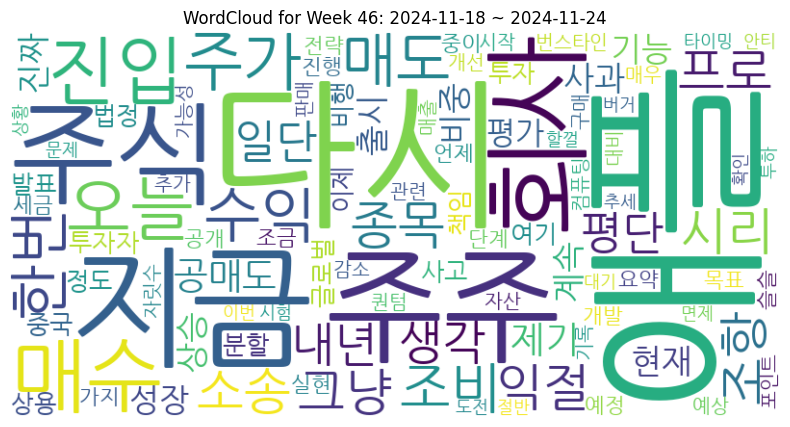

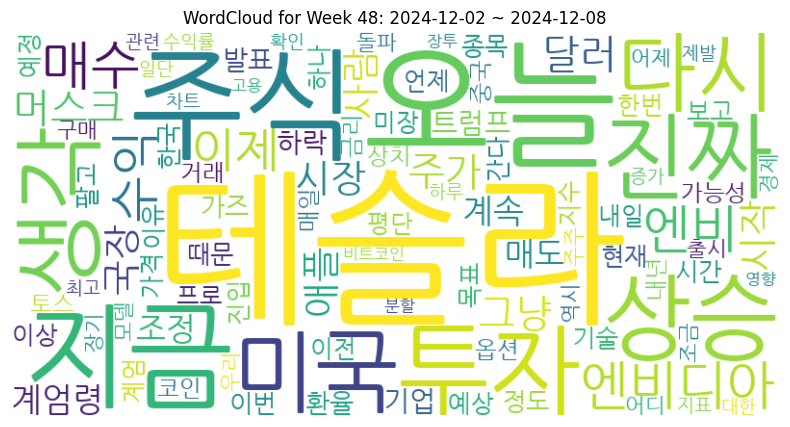

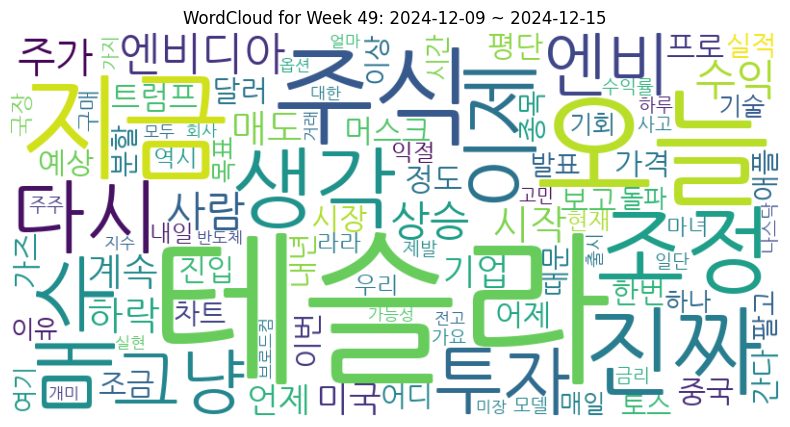

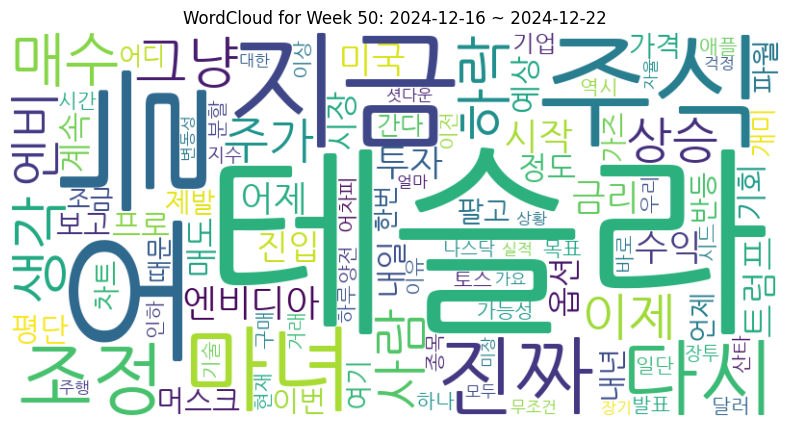

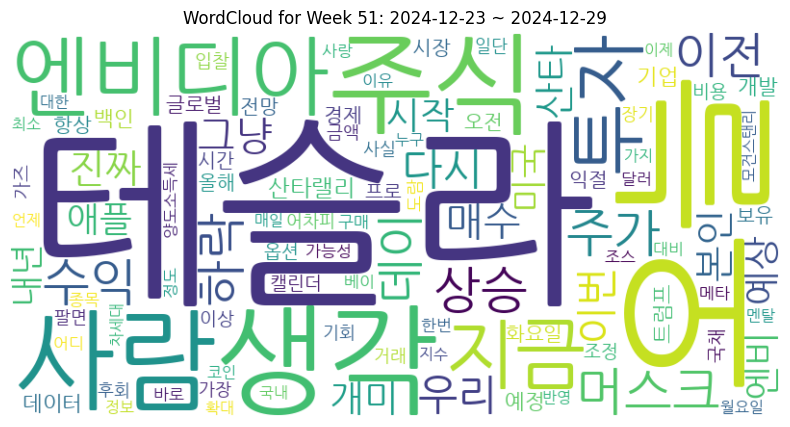

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from konlpy.tag import Okt  # 한글 형태소 분석기
import re

def create_weekly_wordcloud(comments, title):
    # 텍스트 전처리
    okt = Okt()
    
    # 모든 코멘트를 하나의 문자열로 합치기
    text = ' '.join(comments)
    
    # 특수문자 제거(또 다른 불용어 여기에)
    text = re.sub(r'[^\w\s]', '', text)
    
    # 형태소 분석 (명사만 추출)
    nouns = okt.nouns(text)
    
    # 한글자 단어 제거
    nouns = [noun for noun in nouns if len(noun) > 1]
    
    # 워드클라우드 생성
    wordcloud = WordCloud(
        font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  # 한글 폰트 경로
        background_color='white',
        width=800,
        height=400,
        max_words=100
    ).generate_from_frequencies(Counter(nouns))
    
    # 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# 각 주차별로 워드클라우드 생성
for week_key, comments in weeklyComments.items():
    create_weekly_wordcloud(comments, f'WordCloud for {week_key}')
